In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv(r"D:\Data_Set\loan_data_set.csv")

In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace = True)

In [7]:
dataset["Married"].fillna(dataset["Married"].mode()[0],inplace = True)

In [8]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
en_data = dataset[["Gender","Married"]]
en_data

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
...,...,...
609,Female,No
610,Male,Yes
611,Male,Yes
612,Male,Yes


In [11]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    uint8
 1   Gender_Male    614 non-null    uint8
 2   Married_No     614 non-null    uint8
 3   Married_Yes    614 non-null    uint8
dtypes: uint8(4)
memory usage: 2.5 KB


In [12]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [13]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder(drop='first')
ar = ohe.fit_transform(en_data).toarray()
ar

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [20]:
pd.DataFrame(ar,columns=["Gender_Male","Married_Yes"])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# lebal encode

In [21]:
import pandas as pd

In [22]:
df =  pd.DataFrame({"name":["car",'men','women','Singapore','Shyam']})

In [23]:
df

,name
0,car
1,men
2,women
3,Singapore
4,Shyam


In [24]:
from  sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit_transform(df['name'])

array([2, 3, 4, 1, 0])

In [26]:
df['en_name'] = le.fit_transform(df['name'])

In [27]:
df

,name,en_name
0,car,2
1,men,3
2,women,4
3,Singapore,1
4,Shyam,0


In [28]:
dataset =  pd.read_csv(r"D:\Data_Set\loan_data_set.csv")

In [29]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [30]:
la = LabelEncoder()
la.fit(dataset['Property_Area'])

LabelEncoder()

In [35]:
dataset["Property_Area"].unique()

array([2, 0, 1])

In [34]:
dataset["Property_Area"] = la.transform(dataset['Property_Area'])

In [36]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


# Odinal Encoding

In [47]:
import pandas as pd

In [48]:
df  = pd.DataFrame({'Size':['s','m','l','xl','s','xxl','l','m','xl','m','s','xxxl','m','l']})
df.head()

,Size
0,s
1,m
2,l
3,xl
4,s


In [49]:
df

,Size
0,s
1,m
2,l
3,xl
4,s
5,xxl
6,l
7,m
8,xl
9,m


In [50]:
ord_data =  [["s","m","l","xl","xxl","xxxl"]]

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df[["Size"]])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl', 'xxl', 'xxxl']])

In [54]:
oe.transform(df[["Size"]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [4.],
       [2.],
       [1.],
       [3.],
       [1.],
       [0.],
       [5.],
       [1.],
       [2.]])

In [55]:
df['Size_en'] = oe.transform(df[["Size"]])

In [56]:
df

,Size,Size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,xxl,4.0
6,l,2.0
7,m,1.0
8,xl,3.0
9,m,1.0


In [57]:
ord_data1 = {'s':0,'m':1,'l':2,'xl':3,'xxl':4,'xxxl':5}

In [58]:
df["Size_en_map"] = df['Size'].map(ord_data1)

In [59]:
df

,Size,Size_en,Size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,0
5,xxl,4.0,4
6,l,2.0,2
7,m,1.0,1
8,xl,3.0,3
9,m,1.0,1


In [62]:
dataset['Property_Area'].unique

<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int32>

In [63]:
dataset.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,2,Y


# Outlier

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


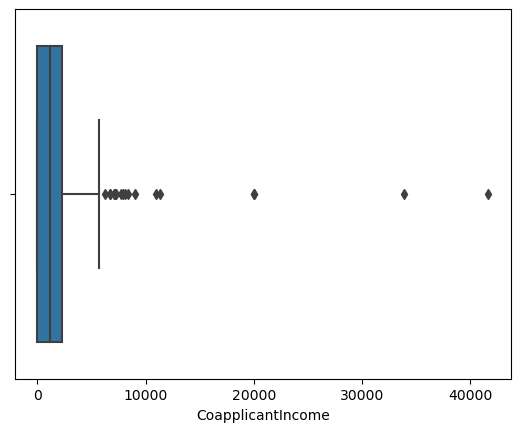

In [7]:
sns.boxplot(x = 'CoapplicantIncome',data = dataset)
plt.show()

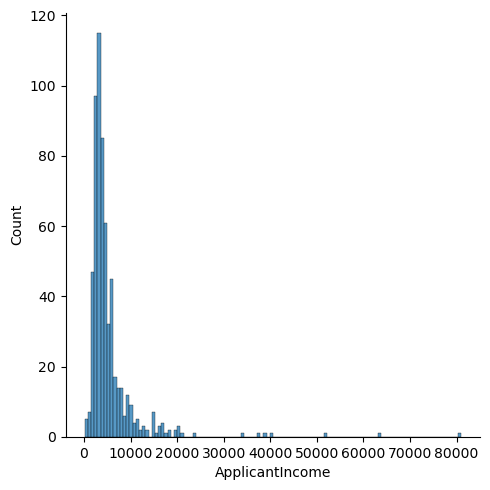

In [8]:
sns.displot(dataset['ApplicantIncome'])
plt.show()

In [9]:
l = [2,3,4,5,6,7,8,9]
sum(l)/len(l)

5.5

In [10]:
l =  [2,3,4,5,6,7,8,9,100]
sum(l)/len(l)

16.0

In [11]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
dataset.shape

(614, 13)

In [13]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q1

0.0

In [14]:
q3 = dataset['CoapplicantIncome'].quantile(0.75)
q3

2297.25

In [15]:
IQR = q3-q1

In [16]:
min_range = q1-(1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(-3445.875, 5743.125)

In [17]:
new_dataset = dataset[dataset['CoapplicantIncome']<=max_range]

In [18]:
new_dataset.shape

(596, 13)

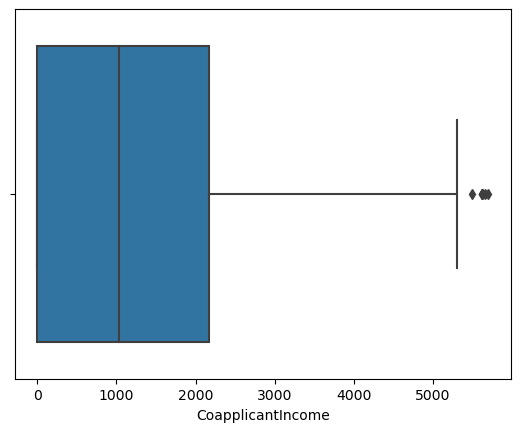

In [19]:
sns.boxplot(x= 'CoapplicantIncome',data = new_dataset)
plt.show()

In [20]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

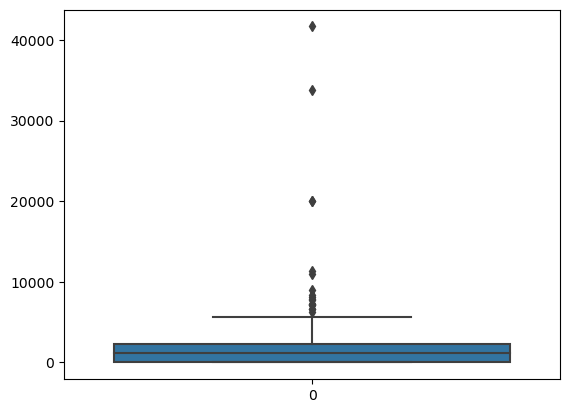

In [21]:
sns.boxplot(dataset['CoapplicantIncome'])

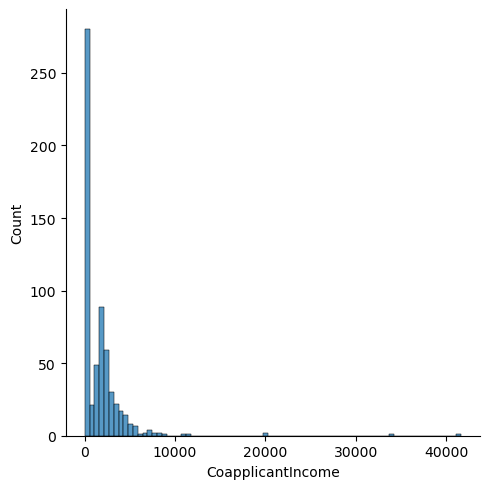

In [22]:
sns.displot(dataset['CoapplicantIncome'])

In [23]:
min_range = dataset["CoapplicantIncome"].mean() -( 3*dataset["CoapplicantIncome"].std())
max_range = dataset["CoapplicantIncome"].mean() +( 3*dataset["CoapplicantIncome"].std())
min_range,max_range

(-7157.499309645475, 10399.990905699677)

In [25]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

<Axes: xlabel='CoapplicantIncome'>

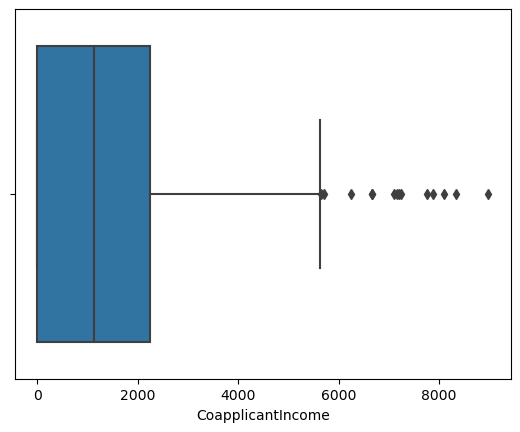

In [26]:
sns.boxplot(x = "CoapplicantIncome",data = new_dataset)

In [27]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/(dataset["CoapplicantIncome"].std())

In [28]:
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [29]:
dataset["z_score"] = z_score

In [30]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [31]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
z_score               0
dtype: int64

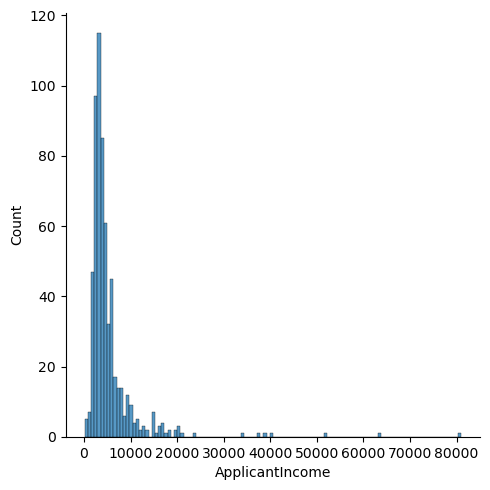

In [34]:
    sns.displot(dataset["ApplicantIncome"])

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [51]:
dataset["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]), columns = ["X"])

In [50]:
    dataset["ApplicantIncome_ss"] =  pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]),columns = ["x"])

In [52]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036,-0.393747


In [53]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,3.761016e-17,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000000e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-5.540356e-01,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-5.540356e-01,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-1.478842e-01,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.310140e-01,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.368502e+01,1.238462e+01


C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\1883835392.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome_ss"])
C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\1883835392.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


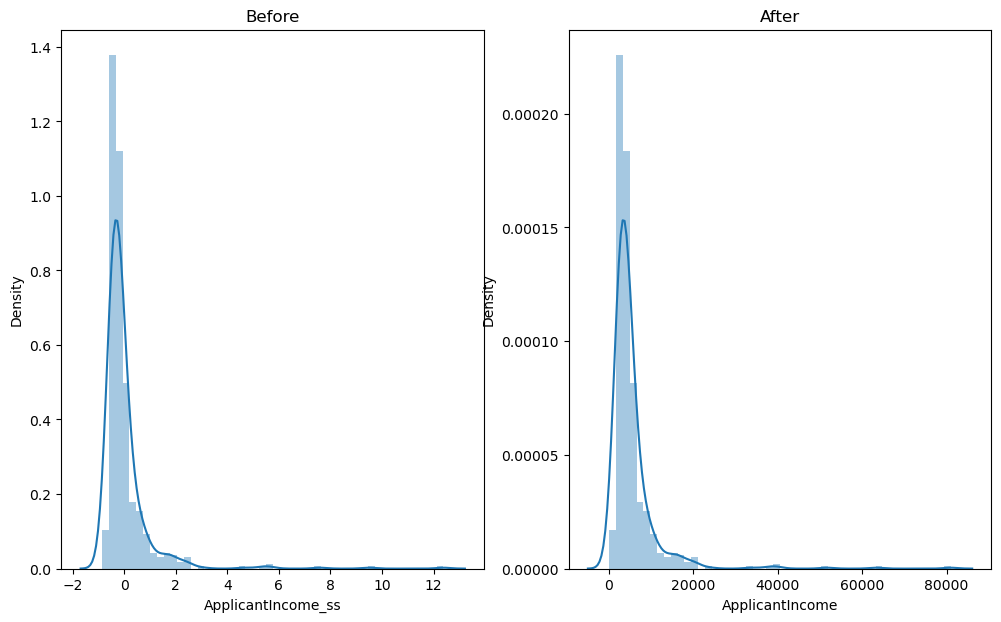

In [58]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["ApplicantIncome_ss"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["ApplicantIncome"])
plt.show()

# feature Scaling(Normalization)

In [59]:
dataset.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
z_score                0
ApplicantIncome_ss     0
dtype: int64

In [60]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,3.761016e-17,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000000e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-5.540356e-01,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-5.540356e-01,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-1.478842e-01,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.310140e-01,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.368502e+01,1.238462e+01


C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


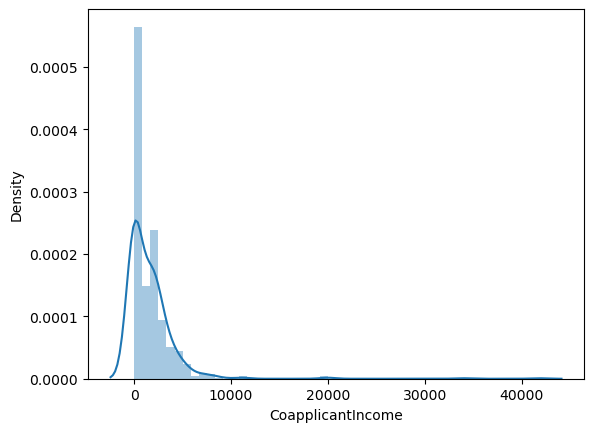

In [61]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
ms = MinMaxScaler()
ms.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [71]:
dataset["CoapplicantIncome_min"]  = ms.transform(dataset[["CoapplicantIncome"]])

In [72]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036,-0.393747,0.000000


C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\2274737683.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\2274737683.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_min"])


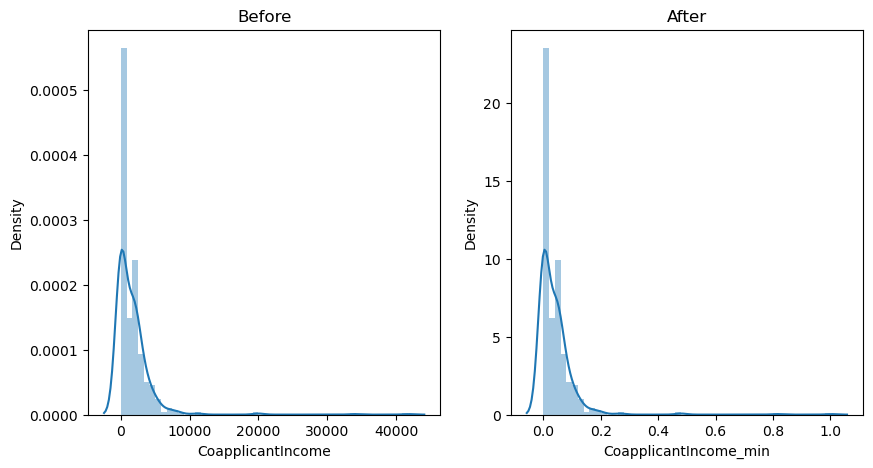

In [75]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_min"])
plt.show()

# Handle Duplicate Data

In [76]:
import pandas as pd

In [83]:
data = {"name":["a","b","c","d","a","b","c"],"eng":[8,7,8,9,8,4,8],"Hindi":[4,5,6,7,4,8,4]} 

In [91]:
df = pd.DataFrame(data)
df

,name,eng,Hindi
0,a,8,4
1,b,7,5
2,c,8,6
3,d,9,7
4,a,8,4
5,b,4,8
6,c,8,4


In [93]:
df.drop_duplicates(inplace=True)

In [85]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [86]:
df["duplicated"] = df.duplicated()

In [87]:
df

,name,eng,Hindi,duplicated
0,a,8,4,False
1,b,7,5,False
2,c,8,6,False
3,d,9,7,False
4,a,8,4,True
5,b,4,8,False
6,c,8,4,False


In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df

,name,eng,Hindi,duplicated
0,a,8,4,False
1,b,7,5,False
2,c,8,6,False
3,d,9,7,False
4,a,8,4,True
5,b,4,8,False
6,c,8,4,False


In [94]:
df

,name,eng,Hindi
0,a,8,4
1,b,7,5
2,c,8,6
3,d,9,7
5,b,4,8
6,c,8,4


In [95]:
dataset.shape

(614, 16)

In [96]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [97]:
dataset.drop_duplicates(inplace=True)

In [98]:
dataset.shape

(614, 16)

In [101]:
#######################################################################################################

In [100]:
dataset =  pd.read_csv(r"D:\Data_Set\loan_data_set.csv")

In [102]:
dataset.shape

(614, 13)

In [103]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [105]:
dataset.drop_duplicates(inplace=True)

In [106]:
dataset.shape

(614, 13)

# Replace and change data type

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [108]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [109]:
dataset["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [110]:
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)

In [113]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
dataset["Dependents"].replace("3+","3", inplace = True)

In [116]:
dataset["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [119]:
dataset["Dependents"] = dataset["Dependents"].astype("int64")

In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 67.2+ KB


# Function Transformer

C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


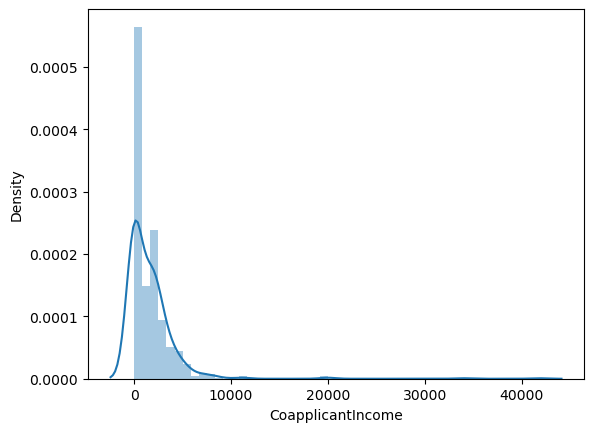

In [129]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [130]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1

In [131]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r,max_r

(-3445.875, 5743.125)

In [134]:
datset = dataset[dataset["CoapplicantIncome"]<=max_r]

C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


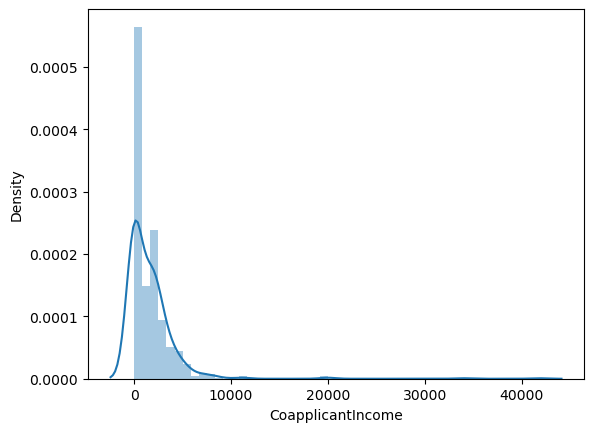

In [135]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [136]:
from sklearn.preprocessing import FunctionTransformer

In [137]:
import numpy as np

In [138]:
ft = FunctionTransformer(func=np.log1p)

In [139]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [140]:
ft.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [141]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\2231862542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\jangi\AppData\Local\Temp\ipykernel_9944\2231862542.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


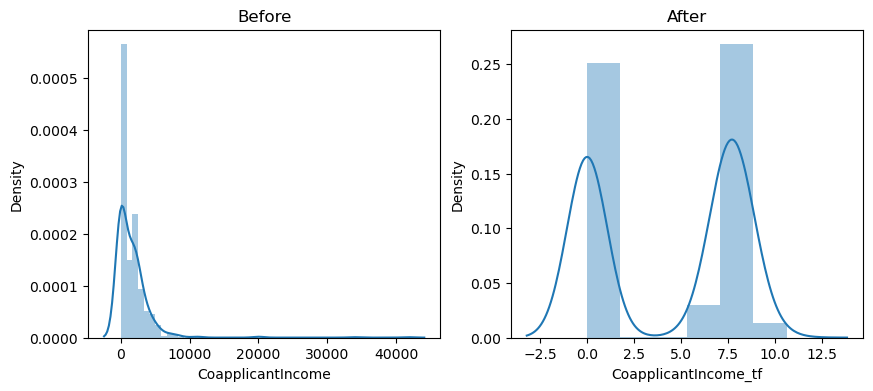

In [144]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")
plt.show()